# Численные методы. Задание 1
### Козловский А.А., гр. 2253

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff, lambdify, Function, Symbol
from sympy.abc import t
from IPython.display import display, Markdown

## Условие задачи
Дана функция $f(x)=x^{5} - x - 0.2$</p>
<b>Необходимо</b>:
<ul><li>Локализовать один из вещественных корней уравнения $f(x)=0$</li>
<li>Уменьшить полученные отрезок локализации $[a, b]$ до длины $10^{-2}$ методом бисекций</li>
<li>Определить корни с точностью $eps=10^{-7}$ методом простых итераций с выбором релаксационного параметра для значения параметра $k=\frac{2}{m+M}$, где $m \leq f'(x) \leq M$</li></ul>

## Решение
### Задание 1. Локализация корня графическим способом
Для того, чтобы определить на каком интервале находится корень, построим график функции $f(x)$ и найдём визуально нужный интервал

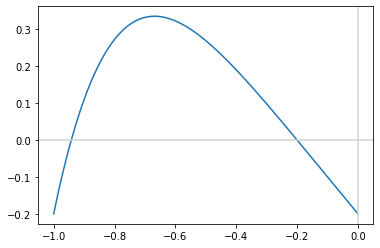

In [39]:
y = lambda x: x ** 5 - x - 0.2
x = np.linspace(-1, 0, 100)
plt.plot(x, y(x))

ax = plt.gca()

ax.axhline(y=0, color='lightgray')
ax.axvline(x=0, color='lightgray')

Как мы видим, нужный интервал можно взять, например от $x \in [-0.4, 0]$

In [40]:
min_x, max_x = -0.4, 0

### Реализация нужных для решения функций
Реализуем функции для метода бисекций и метода простой итерации

In [41]:
def bisection_method(y, x_min, x_max, eps=1e-5):
    """
    Функция для нахождения корня методом бисекций
    
    y: лямбда выражение, характеризующее функцию y(x)
    x_min: левая граница интервала, на котором происходит поиск
    x_max: правая граница интервала, на котором происходит поиск
    eps: требуемая погрешность
    
    returns: корень
    """
    
    while np.abs(y(x_min) - y(x_max)) >= eps:
        x_center = (x_min + x_max) / 2
        
        if y(x_center) * y(x_min) < 0:
            x_max = x_center
        else:
            x_min = x_center
    
    return (x_min + x_max) / 2

In [42]:
def simple_iteration_method(f, arg, x_min, x_max, eps=1e-10):
    """
    Функция для нахождения корня методом простой итерации
    
    y:  sympy Function - функция f(x)
    arg: sympy Symbol - аргумент f(x)
    x_min: левая граница интервала, на котором происходит поиск
    x_max: правая граница интервала, на котором происходит поиск
    eps: требуемая погрешность
    
    returns: корень
    """
    fl = lambdify(arg, f)
    
    derivative = diff(f, arg)
    der_lambd = lambdify(arg, derivative)
    
    l = np.linspace(x_min, x_max, 50)

    min_d = min([der_lambd(i) for i in l])
    max_d = max([der_lambd(i) for i in l])
    
    thau = -2 / (min_d + max_d)    
    x = (x_min + x_max) / 2
    
    difference = thau * fl(x)
    y_old = fl(x) + 1
    y_current = fl(x)
    while np.abs(y_old - y_current) >= eps:
        y_old = fl(x)
        x += difference
        y_current = fl(x)
        difference = thau * fl(x)
        
    return x

### Задание 2. Решение методом бисекций
Теперь решим уравнение $f(x) = 0, x \in [-0.4, 0]$ методом бисекций с погрешностью $eps = 10^{-2}$

In [43]:
eps = 1e-2
res_1 = bisection_method(y, min_x, max_x, eps)

display(Markdown(
    rf"""
<u><i><b>Результат работы метода бисекций</b></i></u> </p>
$x = {res_1}$</p>
Так как мы считали с погрешностью $eps={eps}$, возьмем число до 1 знака
после запятой (не округляем, а просто "отрезаем"), 
потому что остальные цифры - не значимые. </p>
<u>Ответ</u>: $x={res_1:.1f}$"""))


<u><i><b>Результат работы метода бисекций</b></i></u> </p>
$x = -0.203125$</p>
Так как мы считали с погрешностью $eps=0.01$, возьмем число до 1 знака
после запятой (не округляем, а просто "отрезаем"), 
потому что остальные цифры - не значимые. </p>
<u>Ответ</u>: $x=-0.2$

### Задание 3. Решение методом простой итерации
#### Комментарий
Для того, чтобы решать уравнение $f(x) = 0$ методом простой итерации, необходимо найти такую функцию $g(x)$, чтобы уравнения $f(x) = 0$ и $g(x) = x$ были однородны.
Положим, что функция имеет вид $g(x) = x + \tau(x)f(x)$ и $\tau(x) \neq 0$ при $x \in [-0.4, 0]$ <p>
Тогда, действительно, получим уравнение $x = x + \tau(x)f(x)$, которое однородно с $f(x) = 0$. Далее для удоства будем полагать, что $\tau(x) = const \neq 0$ <p>
Но в методе простой итерации последовательность $\{x_{n}\}$, которую мы получаем в ходе итерационного процесса может быть расходящейся, а решение мы найдем только в том случае, если последовательность $\{x_{n}\} \to x_{*}$,  $x_{*} \in \mathbb{R}$, причем $x_{*}$ и будет корнем. <p>
Применим достаточное условие сходимости: $|g'(x_{*})| < 1$. Выполним следующие действия:
     $$|1 + \tau f'(x_{*})| < 1$$
    $$-1 < 1 + \tau f'(x_{*}) < 1$$
    $$-2 < \tau f'(x_{*}) < 0$$
    $$\frac{-2}{f'(x_{*})} < \tau < 0$$
    
Теперь положим, что:
    $$m = \min_{x \in [a, b]}{f'(x)}$$
    $$M = \max_{x \in [a, b]}{f'(x)}$$
Тогда рассмотрим случай, когда $0 < m \leq f'(x_{*}) \leq M$ и получим:
    $$f'(x_{*}) \le M$$
    $$\frac{1}{f'(x_{*})} \ge \frac{1}{M}$$
    $$\frac{-2}{f'(x_{*})} \le \frac{-2}{M}$$
    
Получается, что:
    $$-\frac{2}{f'(x_{*})} \le -\frac{2}{M} \le \tau \le 0 \implies
    \tau \in [-\frac{2}{M}, 0)$$
    
    
Теперь найдем оптимальное $\tau_{0}$. Для этого рассмотрим $q(\tau) = \max_{x}{|1 + \tau f'(x)|}$. Здесь возможно два случая:
    $$\max_{x}{|1 + \tau f'(x)|} = |1 + \tau m|$$
    $$\max_{x}{|1 + \tau f'(x)|} = |1 + \tau M|$$
Получаем, что:
    $$q(\tau_{0}) = \min_{\tau}{\max{(|1 + \tau m|, |1 + \tau M|)}}$$
Этот минимум достигается, если $1 + \tau m = - (1 + \tau M)$. Отсюда следует, что оптимальное $\tau_{0} = -\frac{2}{m + M}$

#### Решение
Теперь просто решим наше уравнение методом простой итерации, используя функции, описанные ранее и теоретический вывод, который мы только что получили

In [44]:
eps = 1e-7
s = Symbol('s')
f = s ** 5 - s - 0.2
res_2 = simple_iteration_method(f, s, min_x, max_x, eps)

display(Markdown(
    rf"""
<u><i><b>Результат работы метода простой итерации</b></i></u> </p>
$x = {res_2}$. В данном случае, погрешность, с которой мы считали
была $eps = {eps}$, поэтому 6 цифр после запятой значимые. </p>
<u>Ответ</u>: $x = {res_2:.6f}$"""))


<u><i><b>Результат работы метода простой итерации</b></i></u> </p>
$x = -0.20032258493108487$. В данном случае, погрешность, с которой мы считали
была $eps = 1e-07$, поэтому 6 цифр после запятой значимые. </p>
<u>Ответ</u>: $x = -0.200323$

### Задание 4
Теперь выведем $|f(x)|$ для $x$, которые мы получили

In [45]:
display(Markdown(rf"""
Для $x_{1}$, полученного методом бисекций $|f(x_{1})| = {np.abs(y(res_1))}$ <p>
Для $x_{2}$, полученного методом простой итерации $|f(x_{2})| = {np.abs(y(res_2))}$ """))


Для $x_1$, полученного методом бисекций $|f(x_1)| = 0.002779206447303284$ <p>
Для $x_2$, полученного методом простой итерации $|f(x_2)| = 4.086685073678709e-09$ 